# Predicting flight delays

This notebook is a start to predict the delays of flights from a 2015 dataset

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
#macbook
airlines = pd.read_csv(os.path.abspath("airlines.csv"))
airports = pd.read_csv(os.path.abspath("airports.csv"))
flights = pd.read_csv(os.path.abspath("flights_train.csv"))

In [33]:
airlines = pd.read_csv("data\\airlines.csv")
airports = pd.read_csv("data\\airports.csv")
flights_original = pd.read_csv("data\\flights_train.csv")
flights = flights_original

## Inspecting the data

In [3]:
delays = flights['ARRIVAL_DELAY']

counter_delay = 0
counter_no_delay = 0 
for delay in delays:
    if delay <= 0:
        counter_no_delay += 1
    if delay > 0:
        counter_delay += 1
print(f' the amount of delays in the set is: {counter_delay} \n the amount of no delays in the set is: {counter_no_delay}')


 the amount of delays in the set is: 895684 
 the amount of no delays in the set is: 1430022


In [23]:
flights_original.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,est_elapsed_delay
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,2354.0,21.0,15.0,205.0,194.0,169.0,1448,430,-22.0,-11.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,2.0,12.0,14.0,280.0,279.0,263.0,2330,750,-9.0,-1.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,18.0,16.0,34.0,286.0,293.0,266.0,2296,806,5.0,7.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,15.0,15.0,30.0,285.0,281.0,258.0,2342,805,-9.0,-4.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,24.0,11.0,35.0,235.0,215.0,199.0,1448,320,-21.0,-20.0


## Making some extra variables that might be nice

In [34]:
flights['est_elapsed_delay']= flights['ELAPSED_TIME'] - flights['SCHEDULED_TIME']


## dummies

First we create dummies for airlines and airports

In [50]:
flights = flights_original
# airlines
dummies_airline = pd.get_dummies(flights.AIRLINE, prefix = "airline")
# origins
dummies_oriport = pd.get_dummies(flights.ORIGIN_AIRPORT, prefix = "oriport")
# destinations
dummies_destiport = pd.get_dummies(flights.DESTINATION_AIRPORT, prefix = "destiport")
flights = pd.concat([flights, dummies_airline, dummies_oriport, dummies_destiport], axis =1)
flights.head

<bound method NDFrame.head of               id  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER  \
0              0  2015      1    1            4      AS             98   
1              1  2015      1    1            4      AA           2336   
2              2  2015      1    1            4      US            840   
3              3  2015      1    1            4      AA            258   
4              4  2015      1    1            4      AS            135   
...          ...   ...    ...  ...          ...     ...            ...   
2818548  2818548  2015      6   30            2      UA           1180   
2818549  2818549  2015      6   30            2      UA           1192   
2818550  2818550  2015      6   30            2      UA           1480   
2818551  2818551  2015      6   30            2      UA           1637   
2818552  2818552  2015      6   30            2      UA           1903   

        TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  ...  destiport_TYS  \
0  

In [48]:
columns=flights.columns
dummies_cols=list(columns[21:])


## Fitting a linear model

In [54]:
x = flights[["est_elapsed_delay"]]

## x2: dummies airlines + est_elapsed_delay
x2 = flights[['est_elapsed_delay', 'airline_AA','airline_AS','airline_B6','airline_DL','airline_EV','airline_F9','airline_HA','airline_MQ','airline_NK','airline_OO','airline_UA','airline_US','airline_VX','airline_WN']]
y = flights['ARRIVAL_DELAY']

Fitting the moddel

In [55]:
linear2 = LinearRegression().fit(x2, y)
delay_predictions = linear2.predict(x2)
print('Intercept: \n', linear2.intercept_)
print('Coefficients: \n', linear2.coef_)

model = sm.OLS(y, x2).fit()
predictions = model.predict(x2) 

print_model = model.summary() 
print(print_model)

Intercept: 
 -520290145865.7662
Coefficients: 
 [1.08082193e+00 5.20290146e+11 5.20290146e+11 5.20290146e+11
 5.20290146e+11 5.20290146e+11 5.20290146e+11 5.20290146e+11
 5.20290146e+11 5.20290146e+11 5.20290146e+11 5.20290146e+11
 5.20290146e+11 5.20290146e+11 5.20290146e+11]
                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                 2.974e+04
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:37:49   Log-Likelihood:            -1.4248e+07
No. Observations:             2818553   AIC:                         2.850e+07
Df Residuals:                 2818538   BIC:                         2.850e+07
Df Model:                          14                                         
Covariance 

In [47]:
linear1 = LinearRegression().fit(x, y)
delay_predictions = linear1.predict(x)
print('Intercept: \n', linear1.intercept_)
print('Coefficients: \n', linear1.coef_)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary() # R = 1.0 so yeah that kind of ruins it
print(print_model) 

Intercept: 
 10.576133466056145
Coefficients: 
 [1.06510009]
                                 OLS Regression Results                                
Dep. Variable:          ARRIVAL_DELAY   R-squared (uncentered):                   0.080
Model:                            OLS   Adj. R-squared (uncentered):              0.080
Method:                 Least Squares   F-statistic:                          2.465e+05
Date:                Fri, 04 Dec 2020   Prob (F-statistic):                        0.00
Time:                        15:13:04   Log-Likelihood:                     -1.4354e+07
No. Observations:             2818553   AIC:                                  2.871e+07
Df Residuals:                 2818552   BIC:                                  2.871e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|

ValueError: x and y must be the same size

# Visualisation

(array([ 12748.,   3580., 271036., 373408., 292031., 370673., 326452.,
        329872., 275315.,  70591.]),
 array([1.0000e+00, 2.4090e+02, 4.8080e+02, 7.2070e+02, 9.6060e+02,
        1.2005e+03, 1.4404e+03, 1.6803e+03, 1.9202e+03, 2.1601e+03,
        2.4000e+03]),
 <a list of 10 Patch objects>)

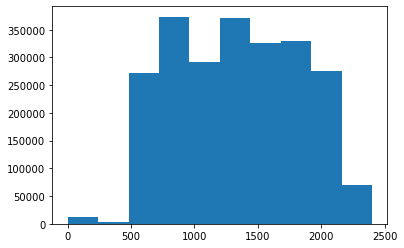

In [20]:
plt.hist(flights['DEPARTURE_TIME'])